# Exam 2 Code

### I will execute the following cells in the order given and examine your answers. In some cases functions, such as $f(x)$ will get overwritten by subsequent problems so be careful when going back over your work.

### If a cell produces a syntax or exception error, you will receive a 0 for the problem. You may recycle code from your numerical experiments, homework solutions, class notes etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate as pn
from numpy.polynomial.legendre import leggauss # Gaussian Quadrature Nodes and Weights
from scipy.special import fresnel # Fresnel sine and cosine integrals

### 1. Use the integral $$4\int_0^{\frac{\pi}2}\sin^2(x)\,dx$$ to estimate $\pi$ using Simpson's rule. Use the minimum number of nodes required to produce an exact answer in each case.

You may arrive at these numbers of nodes numerically (via experimentation, i.e. guess and check).

In [2]:
def f(x):
    return np.sin(x)**2

In [3]:
# INSERT CODE HERE
def simp(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-1:2] = 2
    S = (h/3)*np.dot(f(x),w)
    return S

In [4]:
a,b = 0,np.pi/2
N = 3
print(4*simp(f,a,b,N))
print(np.pi-4*simp(f,a,b,N))
#Python truncates pi at machine 0 so to get it to be "exact" 
#It technically takes 5 nodes but to be within machine 0 generally its 3
#(Machine Zero was the desired precision)

3.1415926535897936
-4.440892098500626e-16


### 2. Solve $$\int_0^x\sin\left(\frac{\pi}2t^2\right)\,dt = 0.5$$ using Newton's method with $x_0 = 0.75$ and the  quadrature rule of your choice for the function evaluations.
* Use fresnel(x)[0] for the true value when computing your error.
* The tolerance is $10^{-5}$
* Your algorithm should result in fewer than 8 iterations.
* Be as efficient as possible when using the quadrature rule.
* The Fresnel function has been loaded for you above.
* fresnel(x)[0]) is the Fresnel sine function

In [5]:
def simpsons(a,x,N):
    h = (x-a)/(N-1)
    x =np.linspace(a,x,N)
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-1:2] = 2
    S = (h/3)*np.dot(g(x),w)-0.5
    return S

In [6]:
def g(x):
    return np.sin(((np.pi)/2)*x**2)

1.0621571546996535
0.5000034690497828
4.17863663253789e-12
5


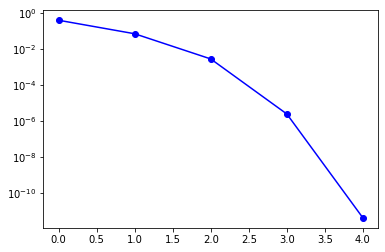

In [7]:
ev = []
x = 0.75
MAXITS = 10
tol = 1e-6
k = 0
err = 1
N = 100000

while err > tol and k < MAXITS:
    eta = simpsons(0,x,N)/g(x)
    x = x - eta
    err = np.fabs(eta)
    k +=1
    ev.append(err)
    
print(x) #This is the estimate (Of the point at which the function results in .5)
print(fresnel(x)[0]) #This is the actual value (This should be about .5)
print(err) #This is the absolute error
print(k) #This is the number of iterations it took
plt.semilogy(np.arange(len(ev)),ev,'bo-')

In [8]:
# INSERT CODE HERE
# YOU MAY USE THE CODE BELOW TO DISPLAY YOUR RESULTS OR COMMENT IT OUT OR CHANGE IT ETC.
print('root = {:1.6f} in {:d} iterations'.format(x, k))
print('S(root) = {:1.6f}'.format(fresnel(x)[0]))

root = 1.062157 in 5 iterations
S(root) = 0.500003


### 3. Use Boole's Rule to approximate $\int_{-2}^3e^{0.2x}\,dx$. How accurate is this approximation?
Boole's Rule is $$\int_{x_0}^{x_4}f(x)\,dx\approx\frac{2}{45}h\left[7f_0+32f_1+12f_2+32f_3+7f_4\right]$$

In [9]:
def o(x):
    return np.exp(0.2*x)

In [10]:
# INSERT CODE HERE
# YOU MAY USE THE CODE BELOW TO DISPLAY YOUR RESULTS OR COMMENT IT OUT OR CHANGE IT ETC.
def boole (f,a,b,n):

       dx = (b - a) / (n-1)
       sum = 7*(f(a) + f(b))
       sum += 32*(f(a+dx)+f(b-dx))
       sum += 12*(f(a+2*dx))
       return 2*sum * dx / 45

#print("boole f1:",boole(f,0,1,5))
#print("boole f2:",boole(g,0,4,5))
print(boole(o,-2,3,5)) #Booles rule calculation
#print(f'I(f) = {BR}')
#print(f'err = {np.fabs(boole-(np.exp(0.6) - np.exp(-0.4))/0.2)}')
print(5.758993772-boole(o,-2,3,5)) #comparision between actual result and booles

5.758996652359827
-2.8803598270954467e-06


### Problem 4. Given the data, interpolate the value $p_n(1.718)$ and plot the interpolating polynomial using 51 interpolating values on the interval $[-1.7,2.7]$.

[-1.8465 -1.3931 -0.9396 -0.4861 -0.0327  0.4208  0.8743  1.3277  1.7812
  2.2347  2.6881]
[-0.3711 -0.611   0.2076  1.7157  0.108  -0.6206 -0.3194  1.3562  0.8861
 -0.4895 -0.5641]
0.2581991146155427
1.718 of the dataset occurs at y equals 1.25820


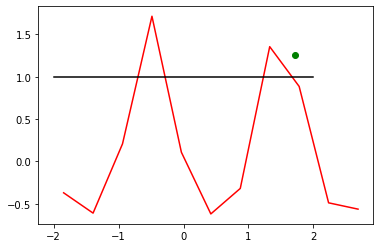

In [11]:
x = np.array([-2.300,-1.8465,-1.3931,-0.9396,-0.4861,-0.0327,0.4208,0.8743,1.3277,1.7812,2.2347,2.6881,3.1416])
y = np.array([ 1.2457,-0.3711,-0.6110,0.2076,1.7157,0.1080,-0.6206,-0.3194,1.3562,0.8861,-0.4895,-0.5641,0.5378])
xx=x[1:-1]
yy=y[1:-1]
print(xx)
print(yy)
z = pn(xx,yy,1.718)
print(z-1)
plt.plot(xx,yy,'r',[-2,2],[1,1],'k',1.718,z,'go')
print('1.718 of the dataset occurs at y equals {:2.5f}'.format(z))
#Z should pull down towards where the black line is crossing the red graph

In [12]:
# INSERT CODE HERE
# YOU MAY USE THE CODE BELOW TO DISPLAY YOUR RESULTS OR COMMENT IT OUT OR CHANGE IT ETC.

### 5. Compare (using a semilogy error plot) the composite trapezoidal rule versus Gaussian quadrature over grid-sizes of $n = 2,4,6,\ldots,20$ for approximating $$\int_{-1}^1e^{\sin(\pi x)}\,dx.$$
* The exact value for testing the rules is given below

In [13]:
from scipy.special import iv
# The exact value of this integral is given by the modified Bessel function of order 0
test = 2*iv(0,1)
print(test)

2.532131755504017


In [14]:
def m(x):
    return np.exp(np.sin(np.pi*x))

In [15]:
def trap(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1] = 2
    T = (h/2)*np.dot(m(x),w)
    return T

In [16]:
trap(m,-1,1,20)
TT = trap(m,-1,1,20)
print(TT)
print(test-TT)

2.532131755504017
0.0


In [17]:
# INSERT CODE HERE
#Gaussian Three-Point Rule
# Define function and interval
a = -1
b = 1

# Gauss-Legendre (default interval is [-1, 1])
N = 20 #Seems you really only need about 9 nodes to get the accuracy "maximized"
x, w = np.polynomial.legendre.leggauss(N)
# Translate x values from the interval [-1, 1] to [a, b]
t = 0.5*(x + 1)*(b - a) + a
gauss = sum(w * m(t)) * 0.5*(b - a)

print ('Gauss-Legendre solution: {:2.5e}'.format(gauss))
print(test-gauss)

Gauss-Legendre solution: 2.53213e+00
-9.001688283660769e-13


-- [back to top](#Exam-2-Code)